# ODK Mapping pipeline.

Copyright 2021 Robert McGregor

This notebook controls the processing of odk mapping results and produces the following shapefiles (output GDA94):
- infrastructure line shapefiles
- infrastructure point shapefiles
- infrasturcutre water point shapefiles
- weeds record shapefiles - ready for WMB data upload 
- general POI mapping shapefiles.

### cd to the directory from the Anaconda/Miniconda terminal.

cd E:\DENR\code\rangeland_monitoring\rmb_mapping

Depending on your system you may need to add "/d"
i.e. cd /d E:\DENR\code\rangeland_monitoring\rmb_mapping

## Setup

### Required packages:
The ODK Aggregate processing pipeline requires the following package:

- numpy
- geopandas
- datetime
- os
- argparse
- sys
- shutill
- warnings
- glob
- geopy

If you are using this notebook locally, you may need to install these packages using conda or pip. Uncomment one of the cells below by removing the hashtag('#') and run the cell by pressing **Shift+Enter**.

In [ ]:
! conda list

## Lets check the core packages versions in your conda environment.

In [ ]:
import pandas; print(f"pandas: {pandas.__version__}")
import numpy; print(f"numpy: {numpy.__version__}")
import geopandas; print(f"geopandas: {geopandas.__version__}")
import argparse; print(f"argpass: {argparse.__version__}")
import geopy; print(f"geopy: {geopy.__version__}")

In [ ]:
# If you do not have the required packages uncomment out the required line if you are on you local computer you will 
# need use external wifi (i.e. hotspot your phone)

#! conda install -c conda-forge numpy geopandas argparse xlsxwriter selenium
#! conda install -c conda-forge numpy
#! conda install -c conda-forge geopandas
#! conda install -c conda-forge argparse
#! conda install -c conda-forge geopy
#! conda install -c conda-forge selenium

## Command arguments

•	Directory odk - the directory containing ODK csv files. 
                   Default: E:\DENR\code\rangeland_monitoring\rmb_mapping_pipeline\raw_odk
                   
•	Export dir – the directory path for an output folder.
                   Default: Z:\Scratch\Zonal_Stats_Pipeline\rmb_mapping\outputs
                   
•	Pastoral districts directory – the directory path to the Pastoral Districts folder,
                   Default: U:\Pastoral_Districts
                   
•	Version - the odk form version (i.e. v1 or v2).
                   Default: v1
                   
•	Remote desktop - defines the workflow based on your computers access.
                    Default: remote auto

                                           
•	Time sleep - time between odk aggregate actions (if network is lagging increase integer).
                   Default: 10
•	Chrome driver - file path for the chrome extension driver (required for remote auto, and remote)
                    Default: E:\DENR\code\rangeland_monitoring\rmb_mapping_pipeline\assets\chrome_driver\chrome_driver_v89_0_4389_23\chromedriver.exe

•	Start date - Filter results by start date
                   Default: Current Year/01/01
                   
•	End date - Filter results by end date 
                   Default: Todays date

•	Weeds list - path to the weeds_list.csv
                   Default 
                   E:\DENR\code\rangeland_monitoring\rmb_mapping_pipeline\assets\weeds_list.csv.
•	Property enquire – Filter data processing to a single property by property name (i.e. “ROCKHAMPTON DOWNS”.
                Default – All – all properties will be processed.


### Remote desktop command argument options

o	Remote auto = PGB-BAS14 server, will completely control the workflow, you don’t need to do anything – recommended.

o	Remote = PGB-BAS14 server, requires ODK results csv to be manually downloaded: however, will download photos and transect tables – recommended.

o	Local = external computer connected to NTG internet requires ODK results csv, and will download photos - recommended.

o	Offline = external computer not connected to NTG internet - requires ODK results csv and will not download photos - use only when required.  

#### Known issues

- Local computer set up may result in shapefiles with no coordinate reference system (i.e. invalid outputs), run the next cell to determine if you will be able to output valid results.
- Jupyter notebooks retain data in memory, if you want to run process a second time go to Kernel in the Navigation panel and Restart & Clear Output or Restart & Run All.

### Check that you have connected to the project database

In [5]:
import geopandas as gpd
import os

path_parent = os.path.dirname(os.getcwd())
previous_visists_shapefile =  path_parent +  '\\assets\\shapefiles\\NT_StarTransect_20200713.shp'
gdf = gpd.read_file(previous_visists_shapefile)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Do your results look like this?

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

If yes, you are ready to run some code.

If not, open this notebook from within the conda environment zonal, and try again.

Still having issues? Contact Rob or Grant on Teams, sharing your screen to trouble shoot.

## Run the RMB Mapping pipeline

#### Change your working directory to code

In [1]:
import os
path_parent = os.path.dirname(os.getcwd())
code_dir =  path_parent +  '\\code'
os.chdir(code_dir)
print(os.getcwd())

E:\DENR\code\rangeland_monitoring\rmb_mapping_pipeline\code


In [2]:
%run step1_1_initiate_mapping_pipeline.py -h

usage: step1_1_initiate_mapping_pipeline.py [-h] [-d DIRECTORY_ODK]
                                            [-x EXPORT_DIR]
                                            [-pd PASTORAL_DISTRICTS_DIRECTORY]
                                            [-ver VERSION] [-r REMOTE_DESKTOP]
                                            [-t TIME_SLEEP] [-c CHROME_DRIVER]
                                            [-s START_DATE] [-e END_DATE]
                                            [-w WEEDS_LIST]
                                            [-pe PROPERTY_ENQUIRE]
                                            [-i INFRASTRUCTURE_DIRECTORY]
                                            [-td TRANSITION_DIR]
                                            [-a ASSETS_DIR]

Process raw RMB Mapping result csv -> csv, shapefiles.

optional arguments:
  -h, --help            show this help message and exit
  -d DIRECTORY_ODK, --directory_odk DIRECTORY_ODK
                        The directory containing ODK

The following data filters have been applied:
 - Start date: 2021-01-01
 - End date:  2021-07-12
 - Property name:  All
You are processing this outside of the remote server, you may need to adjust your computer settings for optimisation, you will also need to double check the shapefile outputs have the correct spatial information.
Searching for:  RMB_Mapping_v1_results.csv
RMB_Mapping_v1_results.csv  located!!
prop name identified:  ANNITOWA
prop name identified:  BIRRINDUDU
prop name identified:  BOND SPRINGS
prop name identified:  ELKEDRA
prop name identified:  GOONDOOLOO
prop name identified:  HORSESHOE BEND
prop name identified:  MOROAK
prop name identified:  MOUNTAIN VALLEY
prop name identified:  OORATIPPRA
prop name identified:  ROCKHAMPTON DOWNS
prop name identified:  ROSEWOOD
prop name identified:  WALLAMUNGA
property name to be processed:  ANNITOWA
 - line feature: line features
 - point feature:  infra_water_points
property name to be processed:  BIRRINDUDU
 - line feature: l

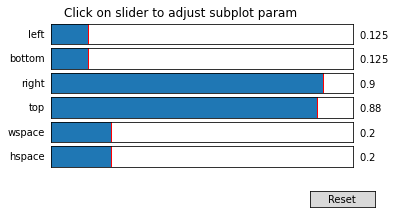

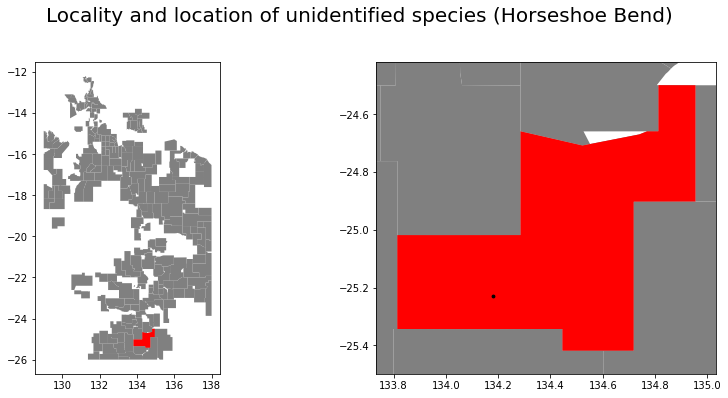

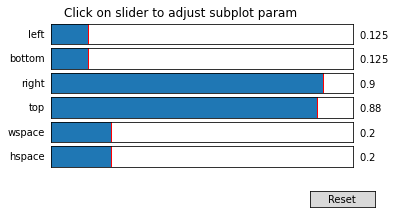

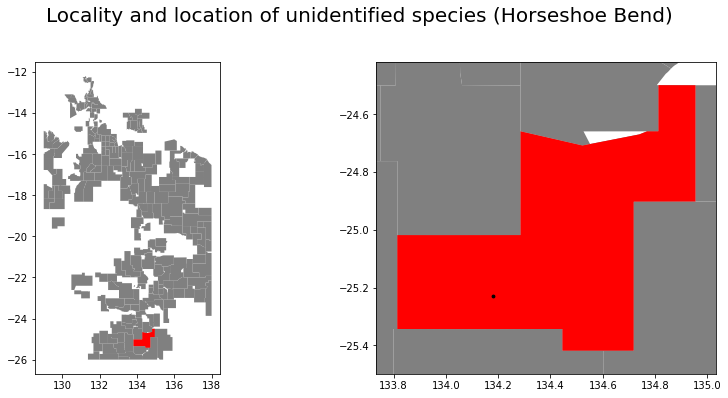

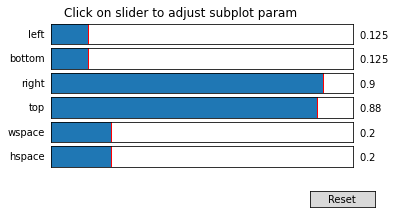

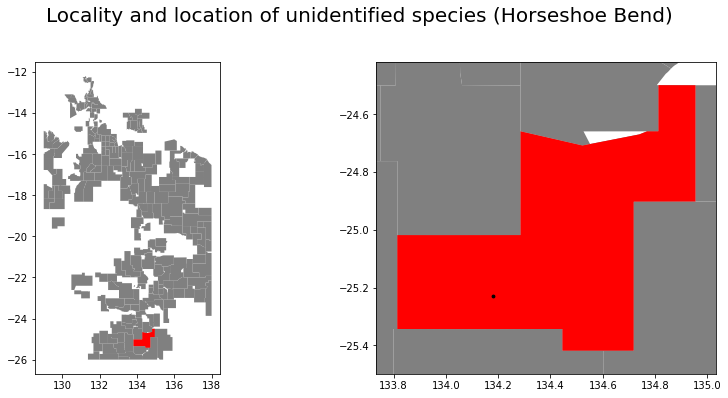

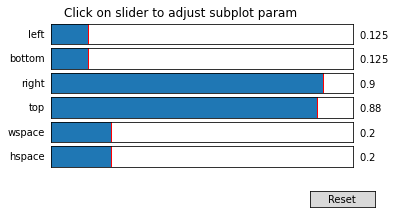

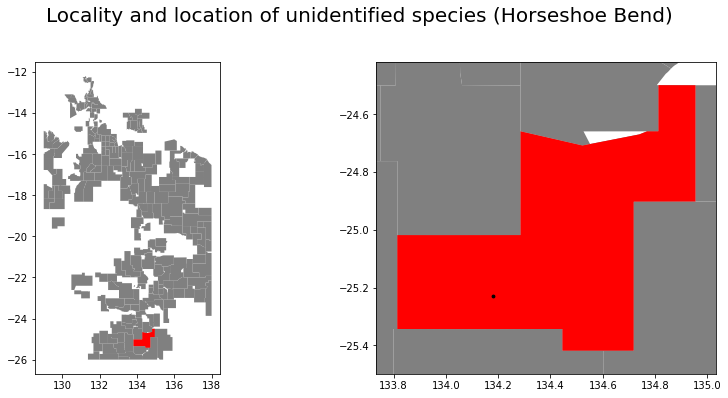

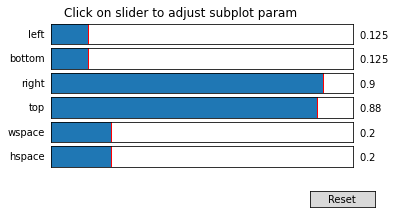

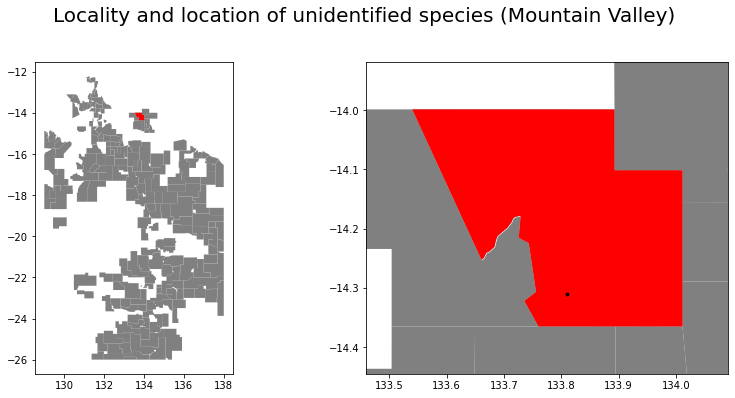

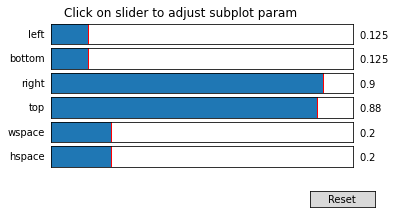

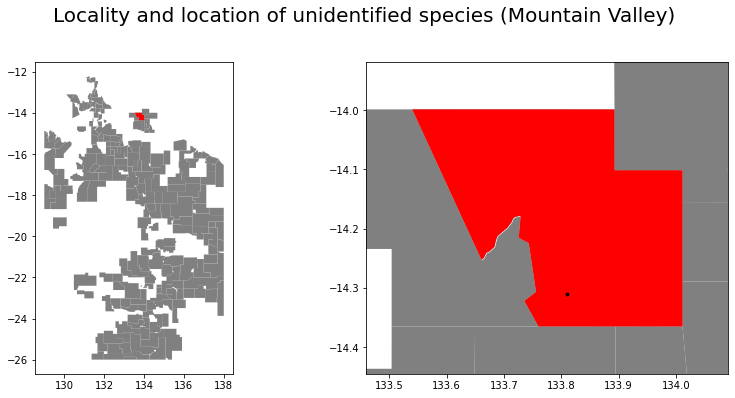

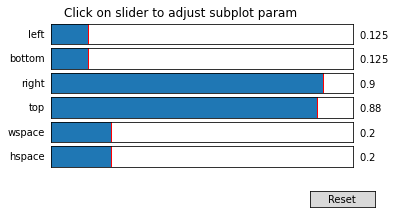

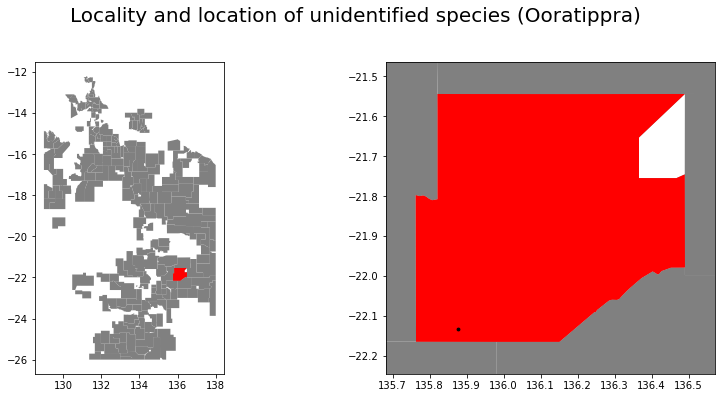

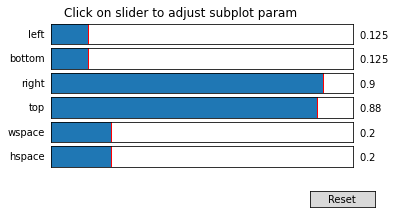

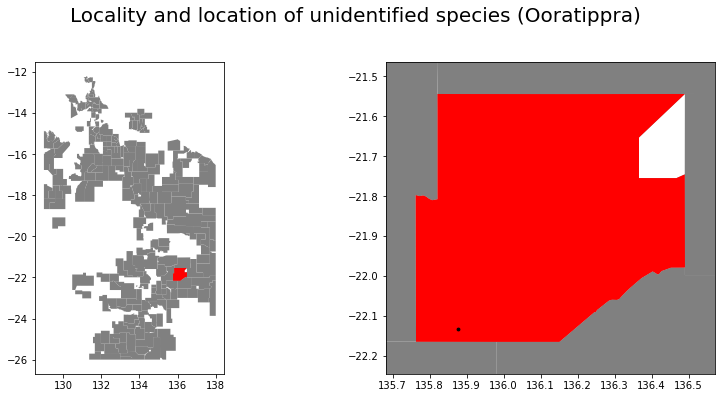

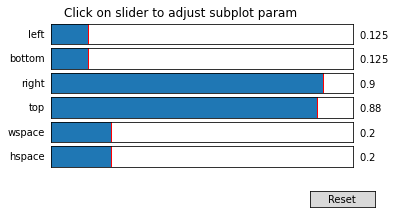

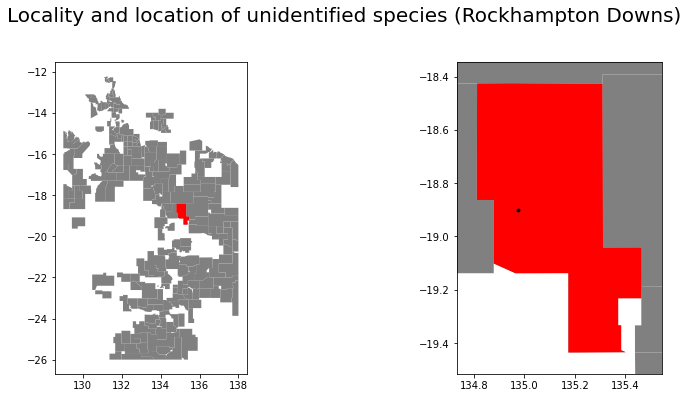

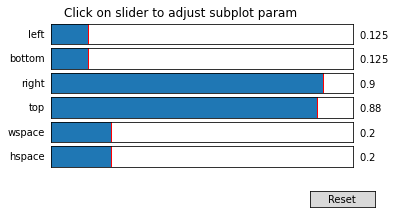

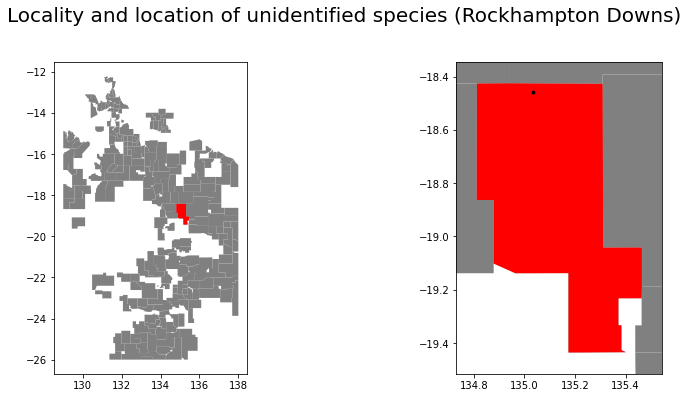

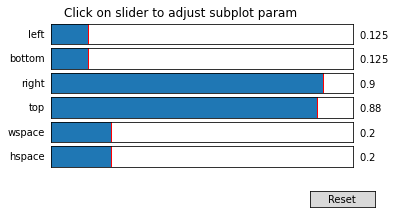

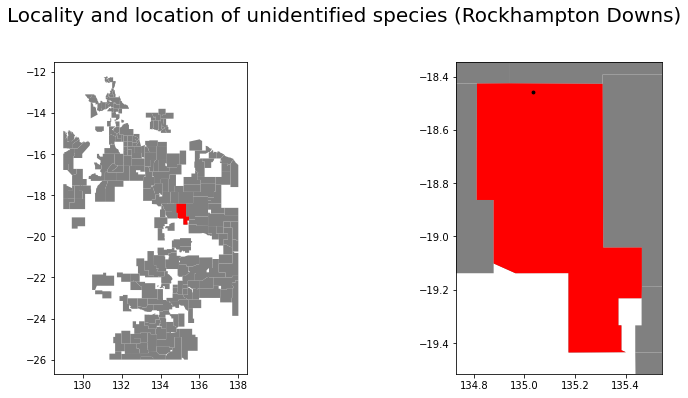

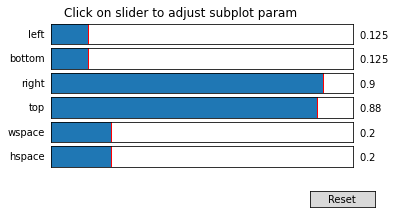

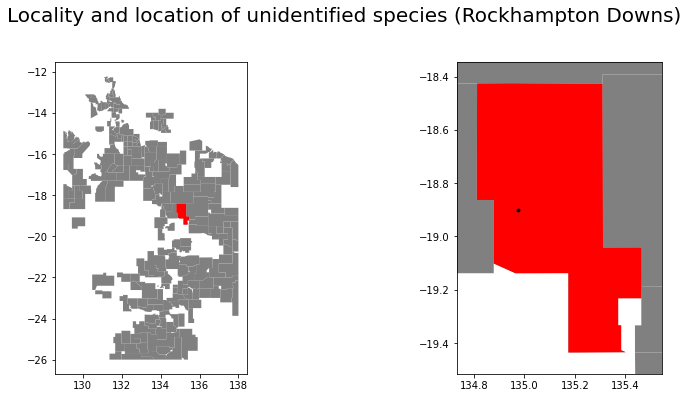

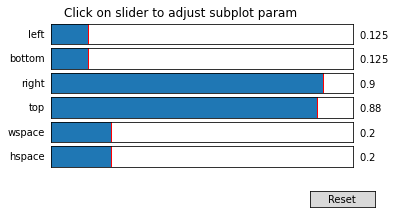

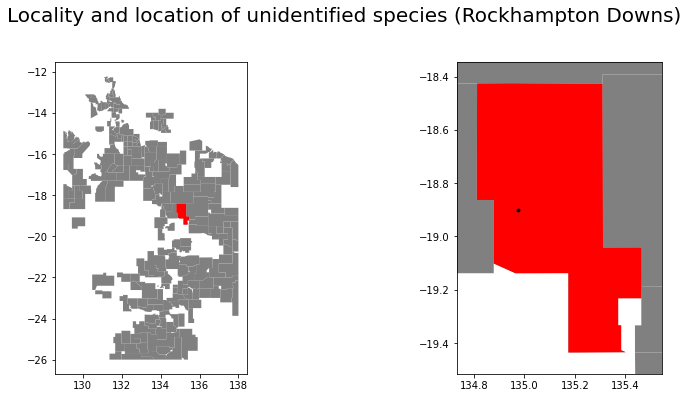

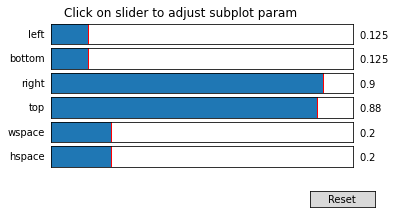

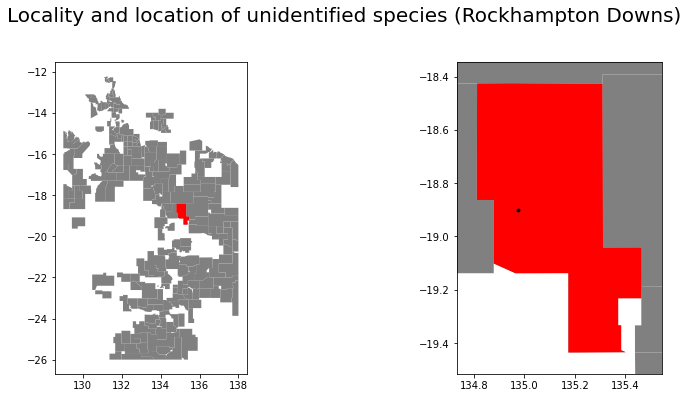

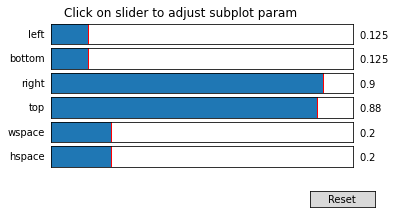

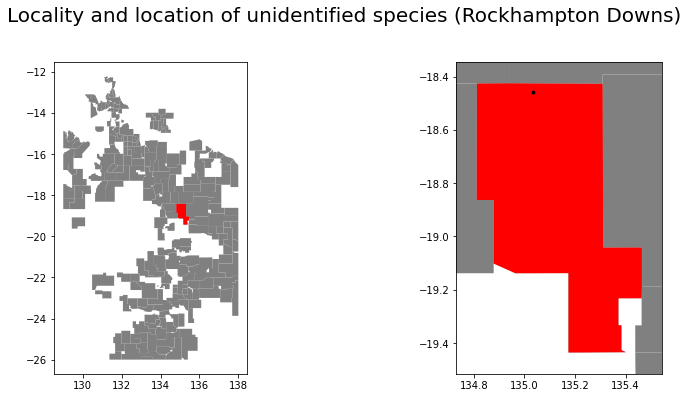

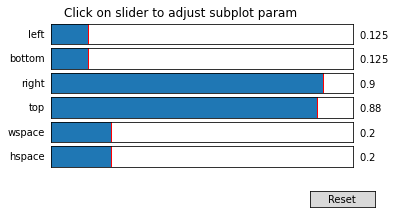

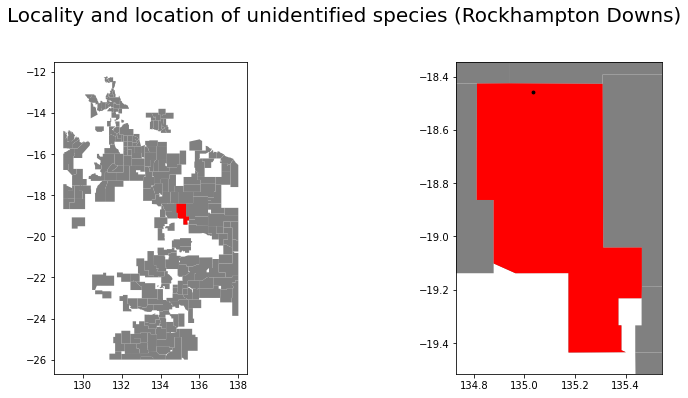

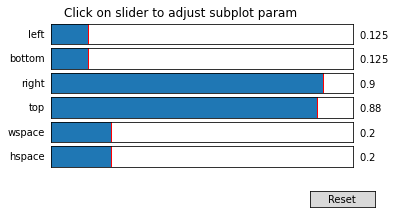

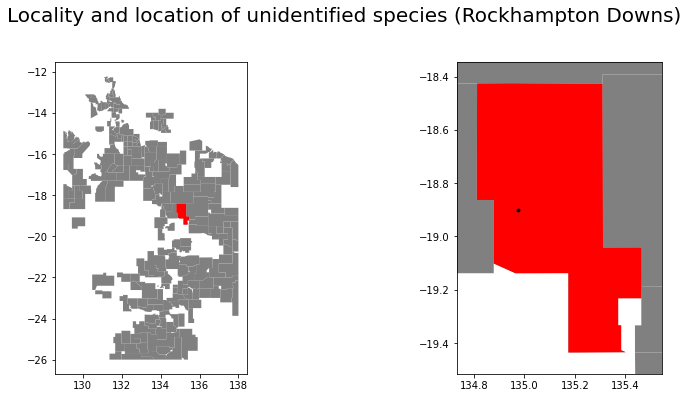

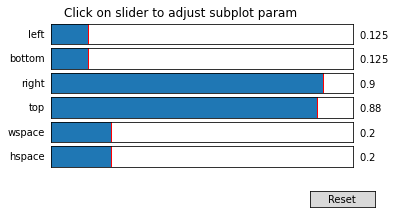

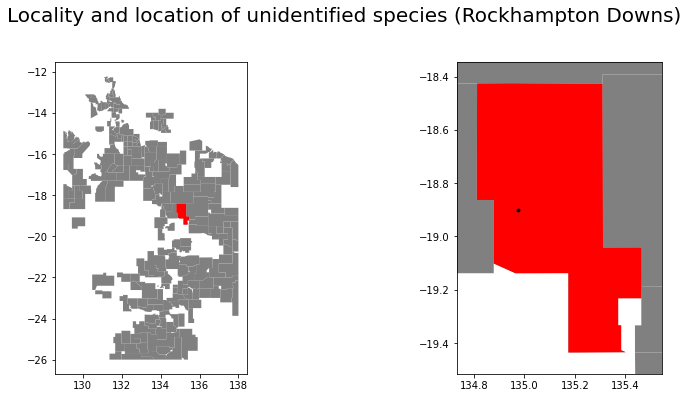

In [4]:
%run step1_1_initiate_mapping_pipeline.py -r local -d Z:\Scratch\Zonal_Stats_Pipeline\rmb_mapping\raw_odk\rmcgr -pe